# PS4: Quantitative Macroeconomics
## Jorge Batanero 

## Partial Equilibrium With Certainty

**Recursive Formulation of the Wealth Model**


The recursive formulation of the simple wealth economy is given by, 


(1)  $V(a,y) = \underset{\bar A \leq a' \leq (1+r)a+yw}{\max{}} u(wy + (1+r)a - a') + \beta \sum_{y'} \pi(y'|y) V'(a',y') $

Which can be written as follows:

  $V(a,y) = \underset{\bar A \leq a' \leq (1+r)a+wy}{\max{}} u(wy + (1+r)a - a')-\lambda_a(a'+\bar{A}) + \beta \sum_{y'} \pi(y'|y) V'(a',y')$

FOC:

(2) $\frac{\partial V(a,y)}{\partial a'}=0 \to -u_c(wy + (1+r)a - a')-\lambda_a+\beta \sum_{y'}\pi_{y'|y} \frac{\partial V(a',y')}{\partial a'}=0 $

We need two extra conditions:

- Complementary slackness $\lambda_a(a'+\bar{A})=0$

- Dual feasibility $\lambda_a \ge 0$

Now we apply the envelope theorem. The envelope theorem tells us that the derivative of the value function with respect to a
state variable is the derivative of the utility with respect to that state variable. To arrive at
this result, derive $\frac{\partial V(a,y)}{\partial a}$ where you substitute out for the policy functions $g^a(.)$ which depend
on a. So we can write the problem as follows:

$V(a,y) = \underset{\bar A \leq a' \leq (1+r)a+yw}{\max{}} u(wy + (1+r)a - g^a(a,y))-\lambda_a(g^a(a,y)+\bar{A}) + \beta \sum_{y'} \pi(y'|y) V'(g^a(a,y),y')$

Now taking the derivative with respect to a.
\begin{align}
\frac{\partial V(a,y)}{\partial a}=u_c(wy+(1+r)a-g^a(a,y))(1+r)-u_c(wy+(1+r)a-g^a(a,y))\frac{\partial g^a(a,y)}{\partial a}-\lambda_a\frac{\partial g^a(a,y)}{\partial a}+\beta \sum_{y'}\pi_{y'|y}\frac{V(g^a(a,y))}{\partial g^a(a,y)}\frac{\partial g^a(a,y)}{\partial a}
\end{align}

Therefore given that the policy function is at the maximum, all derivatives $\frac{\partial g^a(a,y)}{\partial a}=0$. Therefore for each period we get $\frac{\partial V(a,y)}{\partial a}=u_c(c)(1+r)$. Substituting in the first order condition we get:

(3) $ u_c(c)=-\lambda_a+\beta(1+r) \sum_{y'}\pi_{y'|y} u_c(c') $

Therefore, 
$
U_c(c)  \left\{ \begin{array}{ll}
\geq \frac{1+r}{1+\rho}\sum_{y'}\pi_{y'|y} u_c(c')) & \textrm{if $a' = \bar{A}$}\\
= \frac{1+r}{1+\rho}  \sum_{y'}\pi_{y'|y} u_c(c')) & \textrm{if $a' \geq \bar{A}$}
\end{array} \right.
$

Where $\bar{A}=0$ if borrowing is not allowed and $\bar{A}=y_{min} \frac {r+1}{r}$ if borrowing is allowed.





In [88]:
# Import packages

import numpy as np 
from numpy import vectorize
import matplotlib.pyplot as plt
from itertools import product

In [89]:
# A remark, the code is basically the same as the one in the simple wealth model
# adding some plots that I did not put on the other code and differenciating the case 
# of certainty and uncertainty, but the way of solving is exactly the same

In [90]:
# Parameters of the model:

ρ = 0.06
r = 0.04
w = 1
β = 1/(1+ρ)
ε=0.0001

# Quadratic Utility

γ = 0
c_bar = 100
σ_y = 0
Y = [1-σ_y, 1+σ_y]
Y = np.array(Y)
# Create a grid for the assest
# Replacing (1+r)/r for 0 we can solve for the case of borrowing not allowed
A = np.linspace(((-(1+r)/r)*Y[0]), 50, 80)

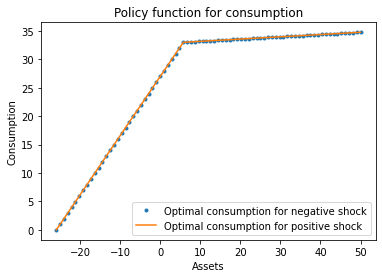

In [91]:
# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

a_y = list(product(Y, A, A))
a_y = np.array(ay)

y = a_y[:, 0]
a_i = a_y[:, 1]
a_j = a_y[:, 2]

# Transition matrix:
π = np.array([((1+γ)/2, (1-γ)/2), ((1-γ)/2, (1+γ)/2)])

# Consumption:
c = y + (1+r)*a_i - a_j
    
@vectorize
def Utility(c):
    
    return -0.5*(c-c_bar)**2
      
Utility = Utility(c)
Utility = np.reshape(Utility, (1, 12800))
Utility = np.reshape(Utility, (160, 80))

# Initial guess for the value function is a vector of zeros:
V_guess = np.zeros(160)

# Compute the matrix W:   
def W1(A):
    
    return π[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - c_bar)**2)/(1-β) + π[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - c_bar)**2)/(1-β)

def W2(A):
    
    return π[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - c_bar)**2)/(1-β) + π[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - c_bar)**2)/(1-β)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = Utility + β*W

V_next = np.amax(X, axis = 1)

diffVs = V_guess - V_next

count = 0

# We iterate until the difference is smaller than ε
while np.any(abs(diff_V)>ε):
    
    Vss = V_next
    V_guess = [Vss[0:80], Vss[80:]]
    V_guess = np.array(V_guess)
    
    def W1(V_guess):
        
        return π[0, 0]*V_guess[0, :] + π[0, 1]*V_guess[1, :]
    
    def W2(V_guess):
        
        return π[1, 0]*V_guess[0, :] + π[1, 1]*V_guess[1, :]

    W1 = W1(V_guess)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(V_guess)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = Utility + β*W
    
    V_next = np.amax(X, axis = 1)
    
    diff_V = Vss - V_next
    
    count += 1
    

# Once we obtain convergence, redefine the matrix X:
X = Utility + β*W

# The value function for each possible state of the economy
V_y_low = V_next[0:80]
V_y_high = V_next[80:]

# Now we can obtain the policy functions
g = np.argmax(X, axis = 1)
    
a_optimal_y_low = A[g[0:80]]   # optimal decision of assets given y_low
a_optimal_y_high = A[g[80:]]    # optimal decision of assets given y_high

c_y_low = np.zeros(80)
c_y_high = np.zeros(80)

c_y_low = Y[0]*np.ones(80) + (1+r)*A - a_optimal_y_low

c_y_high = Y[1]*np.ones(80) + (1+r)*A - a_optimal_y_high

for i in range(0, 80):
    
    if c_y_low[i] <= 0:
        
        c_y_low[i] = 0
        
    if c_y_high[i] <= 0:
        
        c_y_high[i] = 0
        
# Plot the value function and the policy function:
plt.figure()
plt.plot(A, c_y_low, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y_high, label = 'Optimal consumption for positive shock')
plt.title('Policy function for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


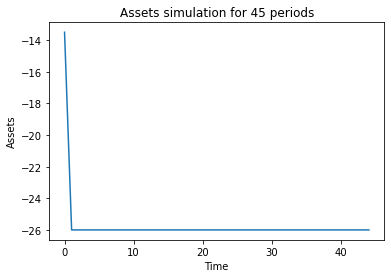

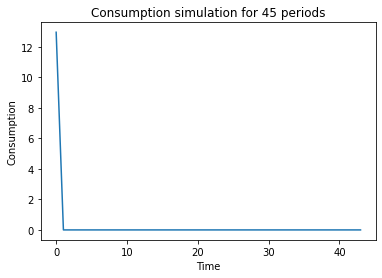

In [92]:
# Simulation time paths for consumption 
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:      
sim = np.zeros(45)

a_optimal_y_low = A[g[0:80]]     # policy function of assets 

g_y_low = g[0:80]

sim[0]  = g_y_low[79] # initial guess of assets  

for i in range(1, 45):
    
        sim[i] = g_y_low[int(sim[i-1])]
        
for i in range(0, 44):
    
        sim[i] = a_optimal_y_low[int(sim[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t, sim[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods')
plt.ylabel('Assets')
plt.xlabel('Time')
plt.show()

# Simulation and plot for consumption:
c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = sim[i]*(1+r)+w*y[0, i]-sim[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()


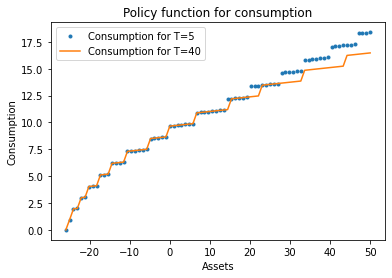

In [93]:
#Finitely-lived households economy 

# T = 45
# Normalize W of T+1 to zero

# Quadratic utility:
# Create a grid for the assest
# Replacing (1+r)/r for 0 we can solve for the case of borrowing not allowed
A = np.linspace(((-(1+r)/r)*Y[0]), 50, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:
a_y = list(product(Y, A, A))
a_y = np.array(a_y)

y = a_y[:,0]
a_i = a_y[:,1]
a_j = a_y[:,2]

# Transition matrix:
π = np.array([((1+γ)/2, (1-γ)/2), ((1-γ)/2, (1+γ)/2)])

c = y+(1+r)*a_i-a_j

@vectorize
  
def Utility(c):
    
    return -0.5*(c-c_bar)**2
     
Utility = Utility(c)
Utility = np.reshape(Utility,(1, 12800))
Utility = np.reshape(Utility,(160, 80))
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finite_V = []
finite_G = []

for count in range(1, 46):
    
    X = Utility + β*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finite_V.append(W)  # It stores each iteration for obtaining the value function at each period
    finite_G.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finite_V = np.array(finite_V)
finite_V = np.transpose(finite_V)
finite_G = np.array(finite_G)
finite_G = np.transpose(finite_G)

# Individual at periods 5 and 40:

A5 = A[finite_G[0:80, 5]]
A40 = A[finite_G[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy function for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


## Partial Equilibrium With Uncertainty

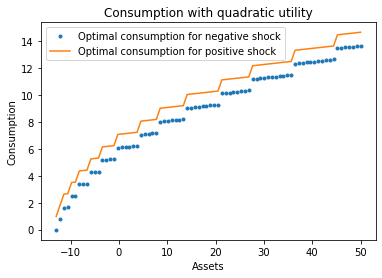

In [94]:
# Infinitely-lived households economy 

γ = 0.95       
c_bar = 100
σ_y = 0.5    

Y = [1-σ_y, 1+σ_y]
Y = np.array(Y)

# Create a grid for the assest
# Replacing (1+r)/r for 0 we can solve for the case of borrowing not allowed
A = np.linspace(((-(1+r)/r)*Y[0]), 50, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

a_y = list(product(Y, A, A))
a_y = np.array(ay)

y = a_y[:,0]
a_i = a_y[:,1]
a_j = a_y[:,2]

# Transition matrix:
π = np.array([((1+γ)/2, (1-γ)/2), ((1-γ)/2, (1+γ)/2)])

c = y+(1+r)*a_i-a_j

@vectorize
  
def Utility(c):
    
    return -0.5*(c-c_bar)**2
     
Utility = Utility(c)
Utility = np.reshape(Utility, (1, 12800))
Utility = np.reshape(Utility, (160, 80))

# Initial guess for the value function is a vector of zeros:
V_guess = np.zeros(160)

# Compute the matrix W:
def W1(A):   
    
    return π[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - c_bar)**2)/(1-β) + π[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - c_bar)**2)/(1-β)

def W2(A):
    
    return π[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - c_bar)**2)/(1-β) + π[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - c_bar)**2)/(1-β)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:
X = Utility + β*W

V_next = np.amax(X, axis = 1)

diff_V = V_guess - V_next

count = 0

# We iterate until the difference is smaller than ε
while np.any(abs(diff_V)>ε):
    
    Vss = V_next
    V_guess = [Vss[0:80], Vss[80:]]
    V_guess = np.array(V_guess)
    
    def W1(V_guess):
        
        return π[0, 0]*V_guess[0, :] + π[0, 1]*V_guess[1, :]
    
    def W2(V_guess):
        
        return π[1, 0]*V_guess[0, :] + π[1, 1]*V_guess[1, :]

    W1 = W1(V_guess)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(V_guess)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = Utility + β*W
    
    V_next = np.amax(X, axis = 1)
    
    diff_V = Vss - V_next
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
X = Utility + β*W

# The value function for each possible state of the economy
V_y_low = V_next[0:80]
V_y_high = V_next[80:]

# Now we can obtain the policy functions
g = np.argmax(X, axis = 1)

a_optimal_y_low = A[g[0:80]]   # optimal decision of assets given y_low
a_optimal_y_high = A[g[80:]]    # optimal decision of assets given y_high

c_y_low = Y[0]*np.ones(80) + (1+r)*A - a_optimal_y_low

c_y_high = Y[1]*np.ones(80) + (1+r)*A - a_optimal_y_high

# Plot the value function and the policy function:
plt.figure()
plt.plot(A, c_y_low, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y_high, label = 'Optimal consumption for positive shock')
plt.title('Consumption with quadratic utility')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

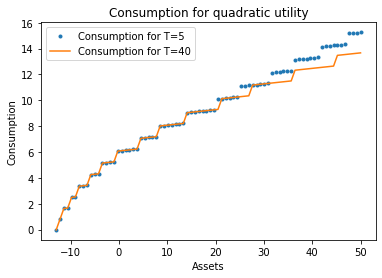

In [95]:
# Finitely-lived households economy

# T = 45
# Normalize W of T+1 to zero


W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finite_V = []
finite_G = []

c = y+(1+r)*a_i-a_j

@vectorize
      
def Utility(c):
    
    return -0.5*(c-c_bar)**2
         
Utility = Utility(c)
Utility = np.reshape(Utility,(1, 12800))
Utility = np.reshape(Utility,(160, 80))

for count in range(1, 46):
    
    X = Utility + β*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finite_V.append(W)       # It stores each iteration for obtaining the value function at each period
    finite_G.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finite_V = np.array(finite_V)
finite_V = np.transpose(finite_V)
finite_G = np.array(finite_G)
finite_G = np.transpose(finite_G)

# Individual at periods 5 and 40:

A5 = A[finite_G[0:80, 5]]
A40 = A[finite_G[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption for quadratic utility')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

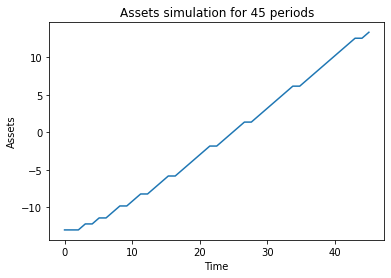

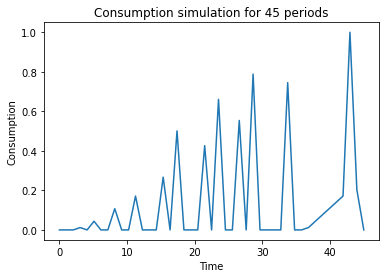

In [96]:
# Simulation time paths for consumption 

# Simulate the shocks of an economy for T = 45
t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-σ_y, 1+σ_y), p = ((1+γ)/2, (1-γ)/2))
 
    a_optimal = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        a_optimal[i] = a_optimal_y_low[i]
    
    if y[0, i] > 1:
        
        a_optimal[i] = a_optimal_y_high[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = a_optimal[i]*(1+r)+w*y[0, i]-a_optimal[i+1]
    
    if c[i] <= 0:
        c[i] = 0
        
plt.figure()
plt.plot(t, a_optimal, label = 'Assets')
plt.title('Assets simulation for 45 periods')
plt.ylabel('Assets')
plt.xlabel('Time')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t, c, label = 'Consumption')
plt.title('Consumption simulation for 45 periods')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()


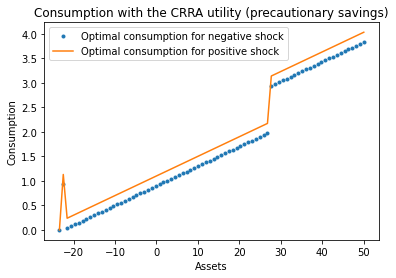

In [97]:
# Infinitely-lived households economy 

σ = 2       # Then we can change it for σ equals to 5 and 20
σ_y = 0.1   # Then we can change it for σ_y equals to 0.5
γ = 0.0      # Then we can change it for γ equals to 0.95
Y = [1-σ_y, 1+σ_y]
Y = np.array(Y)

# Create a grid for the assest
# Replacing (1+r)/r for 0 we can solve for the case of borrowing not allowed

A = np.linspace(((-(1+r)/r)*Y[0]), 50, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

a_y = list(product(Y, A, A))
a_y = np.array(ay)

y = a_y[:, 0]
a_i = a_y[:, 1]
a_j = a_y[:, 2]

# Transition matrix:
π = np.array([((1+γ)/2, (1-γ)/2), ((1-γ)/2, (1+γ)/2)])

c = y+(1+r)*a_i-a_j
 
Utility = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        Utility[i] = ((c[i]**(1-σ))-1)/(1-σ)
        
    if c[i] < 0:
        
        Utility[i] = -100000

Utility = np.reshape(Utility, (1, 12800))        
Utility = np.reshape(Utility, (160, 80))

# Initial guess for the value function is a vector of zeros:
V_guess = np.zeros(160)

# Compute the matrix W:
def W1(A):   
    
    return π[0, 0]*(((Y[0] + (1+r)*A - A)**(1-σ))-1)/((1-σ)*(1-β)) + π[0, 1]*(((Y[1] + (1+r)*A - A)**(1-σ))-1)/((1-σ)*(1-β))

def W2(A):
    
    return π[1, 0]*(((Y[0] + (1+r)*A - A)**(1-σ))-1)/((1-σ)*(1-β)) + π[1, 1]*(((Y[1] + (1+r)*A - A)**(1-σ))-1)/((1-σ)*(1-β))

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:
X = Utility + β*W

V_next = np.amax(X, axis = 1)

diff_V = V_guess - V_next

count = 0

# We iterate until the difference is smaller than ε
while np.any(abs(diff_V)>ε):
    
    Vss = V_next
    V_guess = [Vss[0:80], Vss[80:]]
    V_guess = np.array(V_guess)
    
    def W1(V_guess):
        
        return π[0, 0]*V_guess[0, :] + π[0, 1]*V_guess[1, :]
    
    def W2(V_guess):
        
        return π[1, 0]*V_guess[0, :] + π[1, 1]*V_guess[1, :]

    W1 = W1(V_guess)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(V_guess)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = Utility + β*W
    
    V_next = np.amax(X, axis = 1)
    
    diff_V = Vss - V_next
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
X = Utility + β*W

# The value function for each possible state of the economy
V_y_low = V_next[0:80]
V_y_high = V_next[80:]

# Now we can obtain the policy function
g = np.argmax(X, axis = 1)

a_optimal_y_low = A[g[0:80]]   # optimal decision of assets given y_low
a_optimal_y_high = A[g[80:]]    # optimal decision of assets given y_high

c_y_low = Y[0]*np.ones(80) + (1+r)*A - a_optimal_y_low

c_y_high = Y[1]*np.ones(80) + (1+r)*A - a_optimal_y_high

for i in range(0,80):
    
    if c_y_low[i] < 0:
        c_y_low[i] = 0
    
    if c_y_high[i] < 0:
        c_y_high[i] = 0   

# Plot the value function and the policy function:

plt.figure()
plt.plot(A, c_y_low, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y_high, label = 'Optimal consumption for positive shock')
plt.title('Consumption with the CRRA utility (precautionary savings)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

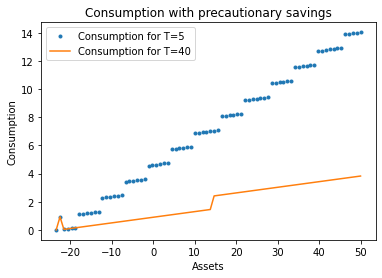

In [98]:
# Finitely-lived households economy

W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finite_V = []
finite_G = []

Utility = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        Utility[i] = ((c[i]**(1-σ))-1)/(1-σ)
        
    if c[i] < 0:
        
        Utility[i] = -100000

Utility = np.reshape(Utility, (1, 12800))        
Utility = np.reshape(Utility, (160, 80))

for count in range(1, 46):
    
    X = Utility + β*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finite_V.append(W)       # It stores each iteration for obtaining the value function at each period 
    finite_G.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finite_V = np.array(finite_V)
finite_V = np.transpose(finite_V)
finite_G = np.array(finite_G)
finite_G = np.transpose(finite_G)

# Individual at periods 5 and 40:

A5 = A[finite_G[0:80, 5]]
A40 = A[finite_G[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0,80):
    
    if C5[i] < 0:
        C5[i] = 0
    
    if C40[i] < 0:
        C40[i] = 0   
        
plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption with precautionary savings')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()



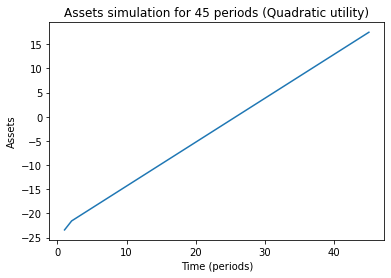

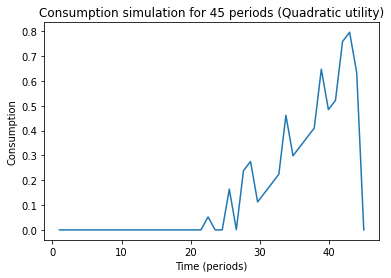

In [99]:
# Simulation time paths for consumption 

# Simulate the shocks of an economy for T = 45

t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-σ_y, 1+σ_y), p = ((1+γ)/2, (1-γ)/2))
    
a_optimal = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        a_optimal[i] = a_optimal_y_low[i]
    
    if y[0, i] > 1:
        
        a_optimal[i] = a_optimal_y_high[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = a_optimal[i]*(1+r)+w*y[0, i]-a_optimal[i+1]
    
    if c[i] <= 0:
        c[i] = 0


plt.figure()
plt.plot(t[1:], a_optimal[1:], label = 'Assets')
plt.title('Assets simulation for 45 periods')
plt.ylabel('Assets')
plt.xlabel('Time')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t[1:], c[1:], label = 'Consumption')
plt.title('Consumption simulation for 45 periods')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()